# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

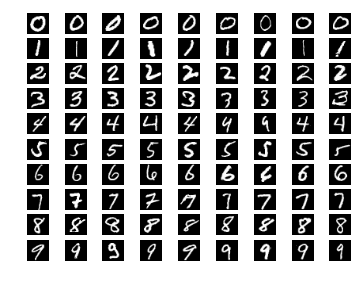

In [5]:
#def P1(num_examples=10):

### STUDENT START ###

dimensions = (28,28) # Set the dimensions of the matrix for each number

for digit in range(0,10): # Loop through each digit
    for col in range(1,10): # Loop through each column for the digit
        # Find the position next value of that digit in the training labels
        pos = np.where(mini_train_labels==digit)[0][col] 
        plt.subplot(10,10,digit*10+col) # Set the subplot position in a 10x10 grid
        plt.imshow(mini_train_data[pos].reshape((dimensions)), cmap='gray') # Plot with gray cmap
        plt.axis('off') # Turn the axis labels off

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
#def P2(k_values):

### STUDENT START ###

ks = [1,3,5,7,9]
for k in ks: # Loop through different values of k
    knn_model = KNeighborsClassifier(n_neighbors=k) # Create knn object
    knn_model.fit(mini_train_data, mini_train_labels) # Fit the training data on the labels
    accuracy = knn_model.score(X = dev_data, y = dev_labels) # Calculate the accuracy
    print "k = " + str(k) + " has accuracy of: " + str(accuracy) # Print results

# Create model for k=1
k = 1
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(mini_train_data, mini_train_labels)
knn_preds = knn_model.predict(dev_data)
# Report displays
print classification_report(y_true = dev_labels, y_pred = knn_preds)

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

k = 1 has accuracy of: 0.888
k = 3 has accuracy of: 0.878
k = 5 has accuracy of: 0.869
k = 7 has accuracy of: 0.865
k = 9 has accuracy of: 0.863
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



**ANSWER: The digit 9 appears to have the lowest F1 score indicating that the model is the least accurate in predicting it.**

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [7]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []

# Loop through each training size and create a knn model
for size in train_sizes:
    start_time = time.time() # Set the start time at the beginning of the process
    
    # Create the model
    knn_model = KNeighborsClassifier()
    knn_model.fit(train_data[:size], train_labels[:size])
    knn_preds = knn_model.predict(dev_data)
    accuracy = knn_model.score(X = dev_data, y = dev_labels) # Calculate the accuracy
    run_time = round(time.time() - start_time, 3) # Calculate the run time
    accuracies.append(accuracy) # Store the accuracy in a list
    
    # Print the results
    print "Training size:" + str(size) + "\t" + "Accuracy: " \
    + str(accuracy) + "\t" + "Run time: " + str(run_time) + " seconds"
    
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Training size:100	Accuracy: 0.598	Run time: 0.176 seconds
Training size:200	Accuracy: 0.752	Run time: 0.365 seconds
Training size:400	Accuracy: 0.81	Run time: 0.727 seconds
Training size:800	Accuracy: 0.85	Run time: 1.474 seconds
Training size:1600	Accuracy: 0.893	Run time: 3.416 seconds
Training size:3200	Accuracy: 0.919	Run time: 6.555 seconds
Training size:6400	Accuracy: 0.941	Run time: 12.992 seconds
Training size:12800	Accuracy: 0.958	Run time: 24.778 seconds
Training size:25000	Accuracy: 0.973	Run time: 53.865 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Linear Regression Prediction of accuracy for k = 60000: 1.34253521266


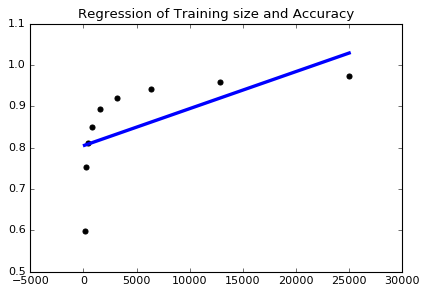

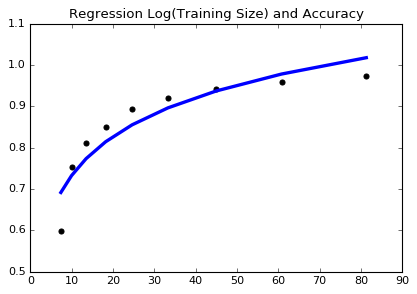

In [8]:
#def P4():

### STUDENT START ###

# Create Numpy arrays from size and accuracies lists
train_sizes1 = np.asarray(train_sizes)
accuracies1 = np.asarray(accuracies)
# Reshape arrays
accuracies1 = accuracies1.reshape(-1,1)
train_sizes1 = train_sizes1.reshape(-1,1)

# Fit a linear regression model
size_accuracy_regression = LinearRegression()
size_accuracy_regression.fit(train_sizes1, accuracies1)

# Predict for 60000 for training size
prediction_6k = size_accuracy_regression.predict(60000)
print "Linear Regression Prediction of accuracy for k = 60000: " + str(prediction_6k[0][0])

# Plot results
plt.scatter(train_sizes1, accuracies1,  color='black')
plt.plot(train_sizes1, size_accuracy_regression.predict(train_sizes1), color='blue',
         linewidth=3)
plt.title("Regression of Training size and Accuracy")
plt.show()

# Create a log of size variable
train_log = np.log10(train_sizes1)

# Fit a linear regression model for log train
size_accuracy_regression = LinearRegression()
size_accuracy_regression.fit(train_log, accuracies1)
# Plot results
plt.scatter(np.exp(train_log), accuracies1,  color='black')
plt.plot(np.exp(train_log), size_accuracy_regression.predict(train_log), color='blue',
         linewidth=3)
plt.title("Regression Log(Training Size) and Accuracy")
plt.show()


### STUDENT END ###

#P4()

**ANSWER: Regession is not a good idea in this case because the accuracy value can not exceed 1 and can only approach 1 as the training size grows. This regression model is predicting an accuracy of 130% for a sample size of 60000, which is not possible. Using an log transformation may be a more reasonible way to represent the accuracy vs. training size.**

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   6  82   1   0   0   0   7   2   0]
 [  0   1   2  72   0   3   0   3   1   4]
 [  0   4   0   0  86   0   2   0   0  12]
 [  1   0   0  13   0  75   1   0   0   1]
 [  1   3   0   0   1   0  93   0   0   0]
 [  1   9   0   0   2   0   0  98   0   3]
 [  0   6   0   7   0   2   1   0  74   6]
 [  1   0   0   2  10   1   0   5   0  87]]


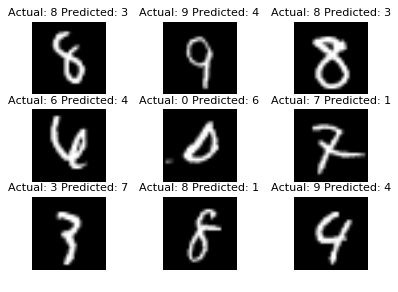

Confusion matrix, without normalization
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   6  82   1   0   0   0   7   2   0]
 [  0   1   2  72   0   3   0   3   1   4]
 [  0   4   0   0  86   0   2   0   0  12]
 [  1   0   0  13   0  75   1   0   0   1]
 [  1   3   0   0   1   0  93   0   0   0]
 [  1   9   0   0   2   0   0  98   0   3]
 [  0   6   0   7   0   2   1   0  74   6]
 [  1   0   0   2  10   1   0   5   0  87]]


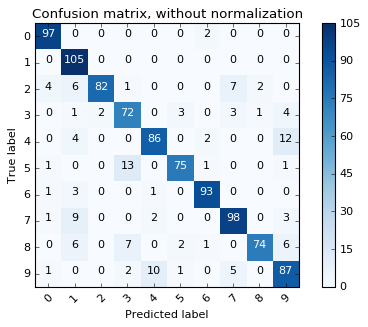

In [9]:
#def P5():

### STUDENT START ###

# Create a KNN model using the mini training set
knn_model = KNeighborsClassifier()
knn_model.fit(mini_train_data, mini_train_labels)
knn_preds = knn_model.predict(dev_data)

print confusion_matrix(dev_labels, knn_preds)

# 4 and 9 get confused the most
# 8 gets confused with 1 and 9

plot_position = 1
#fig=plt.figure(figsize=(10, 25), dpi= 80, facecolor='w', edgecolor='k')

# Plot 8 examples of where the prediction was wrong
for x in np.where(dev_labels != knn_preds)[0]: # Look at examples where prediction was incorrect    
    plt.subplot(3,3,plot_position) # Set the subplot position in a 10x10 grid
    plt.imshow(dev_data[x].reshape((dimensions)), cmap='gray') # Plot with gray cmap 
    plt.title("Actual: "+str(int(dev_labels[x]))+" Predicted: "+str(int(knn_preds[x])), fontsize = 10)
    plt.axis('off') # Turn the axis labels off
    if plot_position == 9: # Stop after printing 9
        break
    plot_position += 1 # Change the plot position
plt.show()


## Function to create a pretty looking confusion matrix (taken from online)
## This function was taken from here: 
## http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
### End of code taken from scikit-learn.org

## Plot the pretty, non-normalized confusion matrix:
plt.figure()
cmatrix = confusion_matrix(dev_labels, knn_preds)
plot_confusion_matrix(cmatrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

### STUDENT END ###

#P5()

**ANSWER: The confusion matrix shows that the digit 5 is commonly predicted incorrectly as a 3. The digits 4 and 9 are commonly confused with eachother. Other numbers that are confused are 8 and 3, 2 and 7, 7 and 1.**

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [62]:
#def P6():

### STUDENT START ###

######## Define functions for burring ###########

# Define a funcation which applies Gaussian blur to the image
def gaus_blur(image):
    dimensions = (28,28)
    image = image.reshape(dimensions) # Reshape to 28x28 matrix
    # Initialize a new feature array with the same shape as the original data.
    image_blurred = np.zeros(image.shape) # Create a image_blurred variable with all zeros
    for index, pixel in np.ndenumerate(image):
        # Check to see if on an edge if so then pass through the image value to the blurred image
        if index[0] in {0,27} or index[1] in {0,27} :
            np.put(image_blurred[index[0]], index[1], image[index])
        else:
            # Calculate the blurred pixel based on all surrounding pixels. Weigh neighboring pixels 1/2
            calc_pixel = (2*image[index] + image[index[0]-1, index[1]-1] + image[index[0]-1, index[1]] +
                             image[index[0]-1, index[1]+1] +image[index[0], index[1]-1] +image[index[0], index[1]+1] +
                             image[index[0]+1, index[1]-1] + image[index[0]+1, index[1]] + image[index[0]+1, index[1]+1])/10
            # put the blurred pixel into the image_blurred array
            np.put(image_blurred[index[0]], index[1], calc_pixel)
    image_blurred = image_blurred.reshape(784,)
    return image_blurred

# Define a function which applies the blur to all images in a set of images
def blur_array(data):
    # Initialize a new feature array with the same shape as the original data.
    data_blur = np.zeros(data.shape)
    # loop through each digit in dataset
    for x in xrange(data.shape[0]):
        # Appy blur and copy to data_blur
        data_blur[x] = gaus_blur(data[x])
    data_blur = np.copy(data_blur) # Copy so links are dropped
    return data_blur

######## Create the blurred data sets ###########

# Create blurred mini training data
mini_train_data_blur = np.copy(blur_array(mini_train_data))

# Create blurred training data
train_data_blur = np.copy(blur_array(train_data))

# Create blurred dev data
dev_data_blur = np.copy(blur_array(dev_data))


######## Fit models and score based on blurred datasets ###########

# Pick the size of the test set
size = 60000

# Create a KNN model using our non pre-processed data
# Calculate accuracy and print
knn_model = KNeighborsClassifier()
knn_model.fit(train_data[:size], train_labels[:size])
knn_model_preds = knn_model.predict(dev_data)
accuracy = knn_model.score(X = dev_data, y = dev_labels) # Calculate the accuracy
print "Accuracy with no preprocessing: " + "\t\t" + str(accuracy)

# Create a KNN model using preprocessed training data
# Calculate accuracy and print
knn_model_train_blur = KNeighborsClassifier()
knn_model_train_blur.fit(train_data_blur[:size], train_labels[:size])
accuracy_train_blur = knn_model_train_blur.score(X = dev_data, y = dev_labels) # Calculate the accuracy
print "Accuracy of preprocessing training data only: " + "\t" + str(accuracy_train_blur)

# Create a KNN model using preprocessed development data
# Calculate accuracy and print
knn_model_dev_blur = KNeighborsClassifier()
knn_model_dev_blur.fit(train_data[:size], train_labels[:size])
accuracy_dev_blur = knn_model_dev_blur.score(X = dev_data_blur, y = dev_labels) # Calculate the accuracy
print "Accuracy of preprocessing dev data only: " + "\t" + str(accuracy_dev_blur)

# Create a KNN model using preprocessed dev and training data
# Calculate accuracy and print
knn_model_both_blur = KNeighborsClassifier()
knn_model_both_blur.fit(train_data_blur[:size], train_labels[:size])
accuracy_both_blur = knn_model_train_blur.score(X = dev_data_blur, y = dev_labels) # Calculate the accuracy
print "Accuracy of preprocessing both training and dev: " + "\t" + str(accuracy_both_blur)

### STUDENT END ###

#P6()

Accuracy with no preprocessing: 		0.973
Accuracy of preprocessing training data only: 	0.98
Accuracy of preprocessing dev data only: 	0.974
Accuracy of preprocessing both training and dev: 	0.982


**ANSWER: The blurring appears generally have a positive impact on accuracy. When applied to the training data an increase was seen to accuracy. A less significant accuracy imporvement when applied to the development data only. The accuracy was improved the most when applied to both, however it is only marginally better than just applying to the training data**

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [63]:
#def P7():

### STUDENT START ###

# Fit Binarized Naive Bayes Model setting binarize to 0.5
nb_model = BernoulliNB(alpha=1, binarize=0.5)
nb_model.fit(train_data, train_labels)

# Fit Naive Bayes Model mapping the pixel values to 0, 1, or 2
def map_pixels(data):
    wgb_data = np.zeros(data.shape)
    
    for index, digit in np.ndenumerate(data):
        if data[index] <= 0.25: # Assign a value of 0 if less than 0.25
            wgb_data[index] = 0
        elif data[index] >= 0.75: # Assign a value of 2 if greater than 0.75
            wgb_data[index] = 2
        elif abs(data[index] - 0.0) != 0.0 and abs(data[index] - 1.0) != 0.0: # Otherwise assign value of 1
            wgb_data[index] = 1
        else:
            raise TypeError('Wrong type of value')
    return wgb_data
    
# Create instance of train data where pixel values are 0, 1, or 2
train_data_wgb = map_pixels(train_data)

# Create a Multinomial Naive Bayes model based on data with 0, 1, 2 pixel values
nb_model_wgb = MultinomialNB(alpha=1)
nb_model_wgb.fit(train_data_wgb, train_labels)

# Calculate score for binarized Niave Bayes
nb_model_score = nb_model.score(X = dev_data, y = dev_labels)

# Calculate dev data
dev_data_wgb = map_pixels(dev_data)
nb_model_wgb_score = nb_model_wgb.score(X = dev_data_wgb, y = dev_labels)

# Print the results
print "Binarized Naive Bayes model score:" + "\t" + str(nb_model_score)
print "Multinomial Naive Bayes model score:" + "\t" + str(nb_model_wgb_score)

### STUDENT END ###

#P7()

Binarized Naive Bayes model score:	0.845
Multinomial Naive Bayes model score:	0.833


**ANSWER: The multi-class version of the naive bayes model does not appear to imrove the results. The score for the binarized model is better than the multinomial. This may be a result of the model overfitting. Modifying bucket ranges for white, grey and black may improve MultinomialNB the model accuracy. Similarly changing the BernoulliNB binarize parameter could improve the score**

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [64]:
#def P8(alphas):

### STUDENT START ###

# Create GridSearchCV to with param_grid set to alpha. Fit to the mini_train_data
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
grid = GridSearchCV(estimator=nb_model, param_grid=alphas)
grid.fit(mini_train_data, mini_train_labels)

# Print the best score and alpha value
print("The best score is: " + str(grid.best_score_) + " when using the alpha value " +  str(grid.best_estimator_.alpha))

# Calculate a Bernoulli NB model with alpha=0
nb_model_zeroalpha = BernoulliNB(alpha=0, binarize=0.5)
nb_model_zeroalpha.fit(train_data, train_labels)
nb_model_zeroalpha_score = nb_model_zeroalpha.score(X = dev_data, y = dev_labels)

# Pring the score of the alpha=0 model
print "The score with alpha = 0 is: " + str(nb_model_zeroalpha_score)

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

The best score is: 0.821 when using the alpha value 0.01
The score with alpha = 0 is: 0.099


In [14]:
#print nb.best_params_

**ANSWER: The value for alpha which improves the accuracy the most is 0.01. The accuracy when the alpha value is zero is 0.099 or about 10%. This is expected because the smoothing paramater when zero basically makes there no smoothing, and will overfit the training data exactly picking up on the noise. 10% accuracy is the same as just guessing a digit 0-9.**

(9) Try training a model using GaussianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [92]:
#def P9():

### STUDENT END ###

# Do a simple fit and score using GaussianNB
nb_gaus = GaussianNB()
nb_gaus.fit(mini_train_data, mini_train_labels)
normal_score = nb_gaus.score(dev_data, dev_labels)
print "The score using GaussianNB without modifying parameters is: \t"  + str(normal_score)

# We know the paramters for the model are as follows:
# theta_ is mean of each feature per class
# sigma_ is the variance of each feature per class

# Create a loop to find the best sigma value
best_step_sigma = 0
best_score_sigma = nb_gaus.score(dev_data, dev_labels)
best_sigma = nb_gaus.sigma_
for x in range(100,200): # loop through in steps of 0.0001
    step = float(x)/10000
    nb_gaus.fit(mini_train_data, mini_train_labels) # Fit the model
    nb_gaus.sigma_ = nb_gaus.sigma_ + step # Modify sigma
    test_score = nb_gaus.score(dev_data, dev_labels) # Find the new score
    if test_score > best_score_sigma: # If the score is the best yet update values
        best_step_sigma = step
        best_sigma = nb_gaus.sigma_
        best_score_sigma = test_score
print "best modified sigma score is: " + str(best_score_sigma)
print "best increase for sigma is: " + str(best_step_sigma)

# Create a loop to find the best theta value
best_step_theta = 0
best_score_theta = nb_gaus.score(dev_data, dev_labels)
best_theta = nb_gaus.theta_
for x in range(1800,2000):
    step = float(x)/10000
    nb_gaus.fit(mini_train_data, mini_train_labels) # Fit the model
    nb_gaus.sigma_ = best_sigma # use best sigma
    nb_gaus.theta_ = nb_gaus.theta_ + step # modify theta
    test_score = nb_gaus.score(dev_data, dev_labels) # Find the new score 
    if test_score > best_score_theta: # If the score is the best so far update it
        best_step_theta = step
        best_theta = nb_gaus.theta_
        best_score_theta = test_score
print "best modified theta score is: " + str(best_score_theta)
print "best increase for theta is: " + str(best_step_theta)

# Fit a model and set theta and sigma to best values found above
nb_gaus.fit(mini_train_data, mini_train_labels)
nb_gaus.theta_ = best_theta
nb_gaus.sigma_ = best_sigma
fixed_score = nb_gaus.score(dev_data, dev_labels)

print "The score using GaussianNB after modifying sigma and theta: \t"  + str(fixed_score)

### STUDENT END ###

#gnb = P9()

The score using GaussianNB without modifying parameters is: 	0.621
best modified sigma score is: 0.793
best increase for sigma is: 0.015
best modified theta score is: 0.818
best increase for theta is: 0.1995
The score using GaussianNB after modifying sigma and theta: 	0.818


**ANSWER: The GaussianNB model assumes the data has a gaussian (normal) distribution. In this case the pixel values have no normal distribution- as a result the model will overfit to the training data, making the variance increddibly small. In order to fix this we can modify the `sigma_` (variance of each feature) and `theta_` (mean of each feature) parameters.**

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

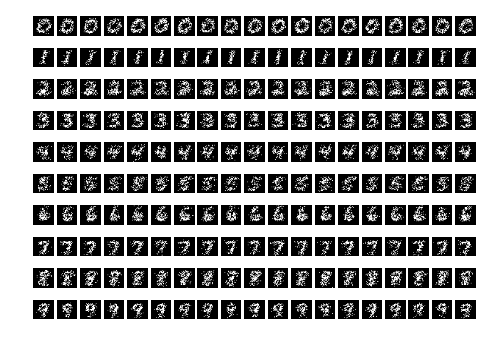

In [196]:
#def P10(num_examples):

### STUDENT START ###

# Create a Bernoulli Naive Bayes model with training data
nb_model = BernoulliNB(alpha=0.01, binarize=0.5)
nb_model.fit(mini_train_data, mini_train_labels)

for digit in range(0,10): # Loop through each digit
    for col in range(1,20): # Loop through each column for the digit
        plt.subplot(10,20,digit*20+col) # Set the subplot position in a 10x20 grid
        # Calculate the digit pixels as generated randomly 0,1 with the probability from the model
        gen_digit = np.exp(nb_model.feature_log_prob_)[digit] > np.random.rand(28*28)
        plt.imshow(gen_digit.reshape((dimensions)), cmap='gray') # Plot with gray cmap
        plt.axis('off') # Turn the axis labels off

### STUDENT END ###

#P10(20)

**ANSWER: Model generated digits are more spotty than the actual training data. This is because the Naive Bayes model assumes each pixels is independent from their surrounding pixels. In reality the pixel should have relationship to its neighbor. For example, it would be very unlikely in the training set to have a black pixel surrounded completely by white pixels.**

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [101]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

# Create a Bernoulli Naive Bayes model with training data
nb_model = BernoulliNB(alpha=0.01, binarize=0.5)
nb_model.fit(train_data, train_labels)
dev_preds = nb_model.predict(dev_data)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

# Calculate the dev predicted values
dev_predicted_probs = nb_model.predict_proba(dev_data)
dev_predicted_probs

###### Calculation with cumulative probability ######

# Clear correct and total counts
correct = []
total = []
for b in buckets: # Loop through each bucket value
    total_count = 0.0
    correct_count = 0.0
    for x in range(len(dev_predicted_probs)): # loop through each predicted probability
        obs_prob = dev_predicted_probs[x][int(dev_preds[x])] # Find the observed probability
        if obs_prob <= b:
            total_count += 1 # Count for each less than the bin value
            if dev_labels[x] == dev_preds[x]:
                correct_count += 1 # count if correct
    # Append to the correct and total lists
    total.append(total_count)
    correct.append(correct_count)

print "######### Cumulative Probability Values ########"   
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

##### Calculation with probability bins #########    

# Initialize total and correct counts
total = [0 for i in buckets]
correct = [0 for i in buckets]

# Loop through each predicted probability
for x in range(len(dev_predicted_probs)):
    obs_prob = dev_predicted_probs[x][int(dev_preds[x])]
    
    # increase count depending on bucket
    # increase correct counter if correct prediction
    if obs_prob <= buckets[0]:
        total[0] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[0] += 1.0
    elif buckets[0] < obs_prob <= buckets[1]:
        total[1] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[1] += 1.0
    elif buckets[1] < obs_prob <= buckets[2]:
        total[2] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[2] += 1.0
    elif buckets[2] < obs_prob <= buckets[3]:
        total[3] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[3] += 1.0
    elif buckets[3] < obs_prob <= buckets[4]:
        total[4] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[4] += 1.0
    elif buckets[4] < obs_prob <= buckets[5]:
        total[5] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[5] += 1.0
    elif buckets[5] < obs_prob <= buckets[6]:
        total[6] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[6] += 1.0
    elif buckets[5] < obs_prob <= buckets[7]:
        total[7] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[7] += 1.0
    elif buckets[5] < obs_prob <= buckets[8]:
        total[8] += 1
        if dev_labels[x] == dev_preds[x]:
            correct[8] += 1.0

print "\n ######### Binned Probability Values ########"   

# Print using the output code provided
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
    
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

######### Cumulative Probability Values ########
p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  44    accuracy = 0.545
p(pred) <= 0.9990000000000    total = 142    accuracy = 0.514
p(pred) <= 0.9999900000000    total = 216    accuracy = 0.556
p(pred) <= 0.9999999000000    total = 280    accuracy = 0.593
p(pred) <= 0.9999999990000    total = 349    accuracy = 0.648
p(pred) <= 0.9999999999900    total = 424    accuracy = 0.691
p(pred) <= 0.9999999999999    total = 508    accuracy = 0.730
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.849

 ######### Binned Probability Values ########
p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  41    accuracy = 0.561
p(pred) <= 0.9990000000000    total =  98    accuracy = 0.500
p(pred) <= 0.9999900000000    total =  74    accuracy = 0.635
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.719
p(pred) <= 0.9999999990000    total

**ANSWER: The problem was unclear as to if the probabilities should be binned or cumulative. I've provided solutions for both. We can see that for p(pred) binned values do not seem to have a coorelation with accuracy. For a strongly calibrated classifier we would expect to see a accuracy similar to the binned value of p(pred). I would identify this as a weakly calibrated classifier.**

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [105]:
#def P12():

### STUDENT START ###

####### ADD PARAMETERS FOR SUM OF ROW AND COLUMN VALUES ########
# Define a function to sum column and row pixel values
def col_row_pixelsum(image):
    image = image.reshape(28,28)
    sum_rows = image.sum(axis = 1)
    sum_cols = image.sum(axis = 0)
    image = image.reshape(28*28)
    image = np.append(arr = image, values=sum_rows)
    image = np.append(arr = image, values=sum_cols)
    return np.copy(image)

# Define a function that applies the col/row function across a dataset
def add_colrowsum_array(data):
    # Initialize a new feature array with the same shape as the original data plus the new features.
    data_colrow = np.zeros(shape = (data.shape[0],data.shape[1]+28+28))
    # loop through each digit in dataset
    for x in xrange(data.shape[0]):
        # Appy col and row sums
        data_colrow[x] = col_row_pixelsum(data[x])
    data_colrow = np.copy(data_colrow) # Copy so links are dropped
    return data_colrow

# Create new data arrays with the row and col features added

mini_train_data_rowcol = add_colrowsum_array(mini_train_data)
train_data_rowcol = add_colrowsum_array(train_data)
dev_data_rowcol = add_colrowsum_array(dev_data)

# set alpha and binarize which will be used for all models
alpha = 0.001
binarize = 0.5

# Fit and score a model with no additional features for baseline MINI TRAINING SET
#nb_model = BernoulliNB(alpha=alpha, binarize=binarize)
nb_model = MultinomialNB(alpha=alpha)
nb_model.fit(X = mini_train_data, y = mini_train_labels)
base_score = nb_model.score(X = dev_data, y = dev_labels)

# Fit and score a model with row and column sum as additional features
#nb_model_rowcol = BernoulliNB(alpha=alpha, binarize=binarize)
nb_model_rowcol = MultinomialNB(alpha=alpha)
nb_model_rowcol.fit(X = mini_train_data_rowcol, y = mini_train_labels)
score_rowcol = nb_model_rowcol.score(X = dev_data_rowcol, y = dev_labels)


# Fit and score a model with no additional features for baseline FULL TRAINING SET
#nb_model = BernoulliNB(alpha=alpha, binarize=binarize)
nb_model_rowcol = MultinomialNB(alpha=alpha)
nb_model = MultinomialNB(alpha=alpha)
nb_model.fit(X = train_data, y = train_labels)
base_score1 = nb_model.score(X = dev_data, y = dev_labels)

# Fit and score a model with row and column sum as additional features
#nb_model_rowcol1 = BernoulliNB(alpha=alpha, binarize=binarize)
nb_model_rowcol1 = MultinomialNB(alpha=alpha)
nb_model_rowcol1.fit(X = train_data_rowcol, y = train_labels)
score_rowcol1 = nb_model_rowcol1.score(X = dev_data_rowcol, y = dev_labels)


####### ADD PARAMETERS FOR number of enclosed regions ########

# Define functions to calculate enclosed spaces

import scipy.ndimage.measurements
import sklearn.preprocessing

def enclosed_spaces(image):
    test_image = np.copy(image).reshape(-1 ,1) # copy image
    test_image = sklearn.preprocessing.binarize(test_image, 0.5) # binarize
    test_image = 1 - test_image # invert image
    test_image = test_image.reshape(28,28) # reshape
    labeled_array, num_features = scipy.ndimage.measurements.label(test_image) # Find the number of unique feature spaces
    num_enclosed = num_features - 1 # subtract 1 to make the number of enclosed spaces
    return num_enclosed
    
def enclosed_analysis_array(data):
    # Initialize a new feature array with the same shape as the original data plus the new features.
    data_enclosed = np.zeros(shape = (data.shape[0],data.shape[1]+1))
    # loop through each digit in dataset
    for x in xrange(data.shape[0]):
        # Appy enclosed spaces value
        data_enclosed[x] = np.concatenate((data[x],[enclosed_spaces(data[x])]))
    data_enclosed = np.copy(data_enclosed) # Copy so links are dropped
    return data_enclosed

# Create new data arrays with the row and col features added

mini_train_encl = enclosed_analysis_array(mini_train_data)
train_data_encl = enclosed_analysis_array(train_data)
dev_data_encl = enclosed_analysis_array(dev_data)

# Fit a model using the enclosed spaces
nb_model_encl = MultinomialNB(alpha=alpha)
nb_model_encl.fit(X = train_data_encl, y = train_labels)
score_encl = nb_model_encl.score(X = dev_data_encl, y = dev_labels)

nb_model_encl_ber = BernoulliNB(alpha=alpha, binarize=binarize)
nb_model_encl_ber.fit(X = train_data_encl, y = train_labels)
score_encl_Bernoulli = nb_model_encl_ber.score(X = dev_data_encl, y = dev_labels)


# Print all the scores
print "#### Mini Training Set ####"
print "The baseline score using mini train data: \t\t\t\t" + str(base_score)
print "The score mini train adding row and column sum features: \t\t" + str(score_rowcol)
print "#### Full training set ####"
print "The baseline score using full training data: \t\t\t\t" + str(base_score1)
print "The score full training set adding row and column sum features: \t" + str(score_rowcol1)
print "The score full training set adding enclosed space feature: \t\t" + str(score_encl)
print "The score full training set adding enclosed space feature BernoullliNB: \t" + str(score_encl_Bernoulli)
### STUDENT END ###

#P12()

#### Mini Training Set ####
The baseline score using mini train data: 				0.794
The score mini train adding row and column sum features: 		0.797
#### Full training set ####
The baseline score using full training data: 				0.827
The score full training set adding row and column sum features: 	0.808
The score full training set adding enclosed space feature: 		0.844
The score full training set adding enclosed space feature BernoullliNB: 	0.857
